In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/home_work_7-8_clustering/Credit%20Card%20Dataset.csv')

print(df.head(5))

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [3]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Figure size 720x432 with 0 Axes>

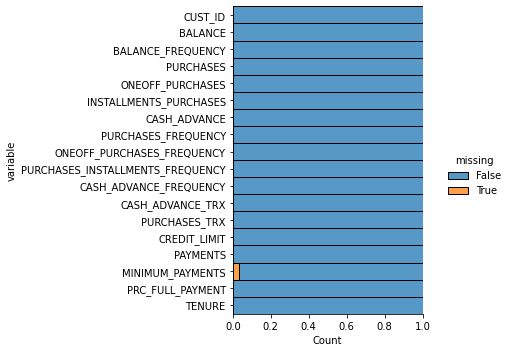

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

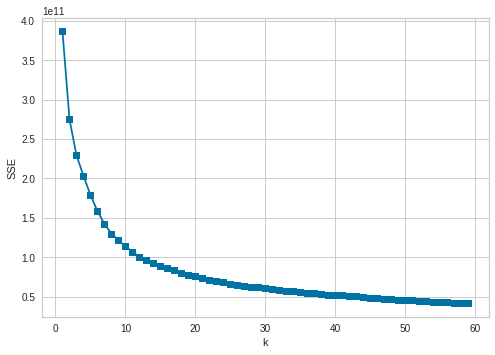

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
     
# df = df.drop('CUST_ID', axis=1)
# df = df.dropna(axis=0, how='any')

SSE = []

for k in range(1,60):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,60), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [28]:
# Оптимальное кол-во примерно от 10 до 15


kmeans = KMeans(n_clusters = 13)
kmeans.fit(df)
df['cluster'] = kmeans.predict(df)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,10
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


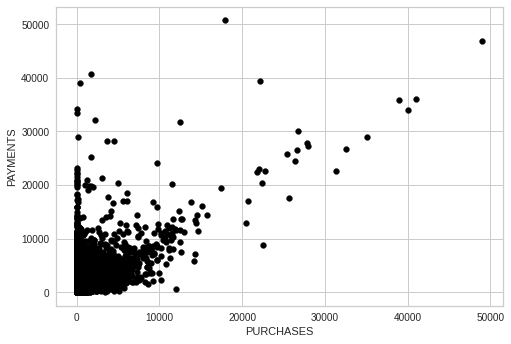

In [22]:
plt.scatter(df['PURCHASES'], df['PAYMENTS'], 35, 'black')
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')
plt.show()

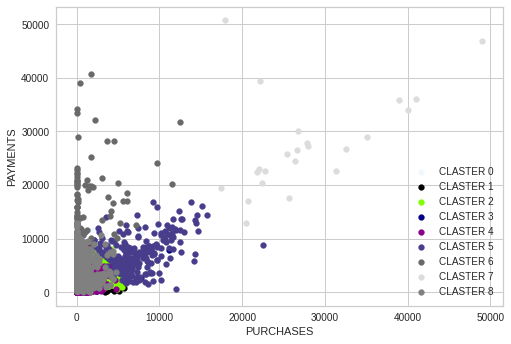

In [25]:
import matplotlib

colors = []
for color in matplotlib.colors.CSS4_COLORS.items():
  colors.append(color)

for i in range(9): 
  plt.scatter(df[df['cluster'] == i]['PURCHASES'], df[df['cluster'] == i]['PAYMENTS'], 35, colors[i * 7][1], label=f'CLASTER {i}')
  plt.legend(loc = 0)
  
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')
plt.show()
     


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


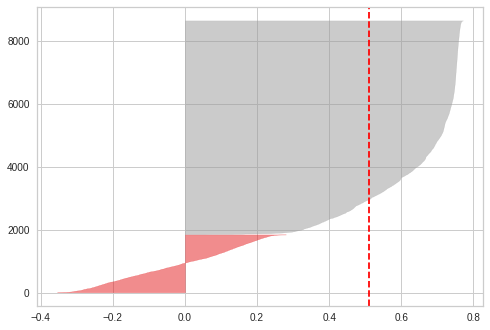

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

for clusters in range(2, 3):
  kmeans = KMeans(n_clusters = clusters)
  kmeans.fit(df)

  visualizer = SilhouetteVisualizer(kmeans)
  visualizer.fit(df)


# получается 2 кластера


In [38]:
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt  

plt.figure(figsize=(15, 15))
rast = linkage(df, 'ward')
dendrogram(rast)
     


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [93.75, 93.75, 133.75, 133.75],
  [75.0, 75.0, 113.75, 113.75],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [173.75, 173.75, 225.625, 225.625],
  [94.375, 94.375, 199.6875, 199.6875],
  [275.0, 275.0, 285.0, 285.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [280.0, 280.0, 303.75, 303.75],
  [147.03125, 147.03125, 291.875, 291.87

Error in callback <function flush_figures at 0x7faace9718b0> (for post_execute):


KeyboardInterrupt: ignored